# Teoría de Circuitos II
## Grupo 3
### Trabajo práctico Nro II- Correciones

**Ejercicio 3**

Un filtro pasabajos Chebyshev se diseña para obtener una atenuación de 48 dB para frecuencias mayores a 9.6 KHz, con una atenuación máxima de 0.4 dB desde continua hasta 3.2 kHz.
Determinar el orden del filtro y el parámetro ɛ.
Graficar la respuesta en módulo del filtro.
Determinar la ubicación de polos y ceros.
Sintetizar el circuito utilizando estructuras Kerwin–Huelsman–Newcomb (KHN, también conocido como Variable de Estado - Ver apéndice-) y simular verificando las condiciones de diseño.


La función transferencia de un filtro de Chebyshev está definido por:

$$ |T(j\omega)| =\frac{1}{\sqrt{1+\epsilon^2 \cdot Cn(\omega)^2}} $$ **Ecuación 7.8 Schaumann**

Donde:

$$ Cn(\omega)=cosh(n \cdot cosh^{-1}(\omega)) $$

Para $\omega_p=1$

$$ \frac{1}{\alpha_{max[veces]}}=\frac{1}{\sqrt{1+\epsilon^2}} $$

De nuestros datos,**Ecuación 7.13 Schaumann**: 

$ \frac{1}{10^{0,04dB/20}}=\frac{1}{\sqrt{1+\epsilon^2}} $

$ 10^{0,04dB/10}=1+\epsilon^2 $


$ \epsilon^2= 10^{0,04dB/10}-1 $

$ \epsilon= \sqrt{10^{0,04dB/10}-1} $

Para $\omega_s$ tenemos **Ecuación 7.18 Schaumann**:

$$ \frac{1}{\alpha_{min[veces]}}=\frac{1}{\sqrt{1+\epsilon^2 \cdot cosh^2(n \cdot cosh^{-1}(\omega_s))}} $$

$$ 10^{\alpha_{min[dB]}/10}=1+\epsilon^2\cosh^2(n \cdot cosh^{-1}(\omega_s)) $$

$$ \sqrt{\frac{10^{\alpha_{min[dB]}/10}-1}{\epsilon^2}}=cosh(n \cdot cosh^{-1}(\omega_s)) $$

$$ cosh(\sqrt{\frac{10^{\alpha_{min[dB]}/10}-1}{\epsilon^2}})=n \cdot cosh^{-1}(\omega_s) $$

$$ n= \frac{cosh^{-1}(\sqrt{\frac{10^{\alpha_{min[dB]}/10}-1}{\epsilon^2}})}{cosh^{-1}(\omega_s)} $$

In [13]:
import numpy as np

alfa_min=48 # en dB
alfa_max=0.4 # en dB
norma=2*np.pi*3.2*(10**3)
wp=1
ws=3
epsilon=np.sqrt(10**(alfa_max/10)-1)
N=np.arccosh(np.sqrt((10**(alfa_min/10)-1)/epsilon**2))/np.arccosh(ws)
N=np.ceil(N)
print("Episilon:",epsilon)
print("Orden:",N)


Episilon: 0.3106093948083108
Orden: 5.0


### Ubicaciones de los polos:



Al ser de 5to orden,hay un polo sobre el eje $\sigma$

Para determinar los demás polos: 

Se utiliza la regla de maxima planicidad:

$\theta_k=180º/5=36º$

En Cheby definimos 'a'

$$a=\frac{1}{n} \cdot senh^{-1}(\frac{1}{\epsilon})$$

$\sigma_0=-sinh(a) $

$\sigma_1=-sinh(a) \cdot cos(36º) $

$\omega_1=cosh(a) \cdot sin(72º) $

$\sigma_2=-sinh(a) \cdot cos(72º) $

$\omega_2=cosh(a) \cdot sin(72º) $






In [14]:
a=(1/N)*np.arcsinh(1/epsilon)

sigma0=-(np.sinh(a)*np.cos(0*np.pi/180)).round(2)
sigma1=-(np.sinh(a)*np.cos(36*np.pi/180)).round(2)
sigma2=-(np.sinh(a)*np.cos(72*np.pi/180)).round(2)
omega1=(np.cosh(a)*np.sin(36*np.pi/180)).round(2)
omega2=(np.cosh(a)*np.sin(72*np.pi/180)).round(2)
p0=complex(sigma0,0)
p1=complex(sigma1,omega1)
p2=p1.conjugate()
p3=complex(sigma2,omega2)
p4=p3.conjugate()
print("P0:",p0)
print("P1:",p1)
print("P2:",p2)
print("P3:",p3)
print("P4:",p4)


P0: (-0.39+0j)
P1: (-0.31+0.63j)
P2: (-0.31-0.63j)
P3: (-0.12+1.02j)
P4: (-0.12-1.02j)


### Simulación simbólica

In [4]:
from scipy import signal

z, p,k = signal.cheby1(N, alfa_max, 1, 'low', analog=True,output='zpk')
p=p.round(2)
print(p)

[-0.12+1.02j -0.31+0.63j -0.39-0.j   -0.31-0.63j -0.12-1.02j]


Si el filtro es de quinto orden obtenemos los polinomios:
        
$$ C_n(\omega)=2\omega C_{n-1}(\omega)-C_{n-2}(\omega)$$

$$ C_0(\omega)=1 $$
$$ C_1(\omega)= \omega $$
$$ C_2(\omega)=2\omega^2-1 $$
$$ C_3(\omega)=2\omega (2\omega^2-1)-\omega =4\omega^3-3\omega $$
$$ C_4(\omega)= 2\omega (4\omega^3-3\omega )-(2\omega^2-1)=8\omega^4-8\omega^2+1$$
$$ C_5(\omega)= 2\omega (8\omega^4-8\omega^2+1)-(4\omega^3-3\omega)=16\omega^5-16\omega^3+2\omega-4\omega^3+3\omega $$
$$ C_5(\omega)=16\omega^5-20\omega^3+5\omega $$

Armando el demonimador:

$Den(j\omega)^2=1+\epsilon^2 \cdot C_5^2(\omega) $

$Den(j\omega)^2=1+\epsilon^2 \cdot (16\omega^5-20\omega^3+5\omega)^2$

$\frac{s}{j}=\omega $

$\omega^5=\frac{s^5}{j^5}=\frac{s^5}{j} $

$\omega^3=\frac{s^3}{j^3}=\frac{s^3}{-j} $

$\omega=\frac{s}{j} $

$Den(s)^2=1+\epsilon^2 \cdot \frac{1}{j^2}(16s^5+20s^3+5s)^2 $

$Den(s)^2=1-\epsilon^2 \cdot (16s^5+20s^3+5s)^2 $

$$ (a+b+c)^2=a^2+b^2+c^2+2ab+2ac+2bc $$

$Den(s)^2=1-\epsilon^2 \cdot (256s^{10}+400s^6+25s^2+640s^8+160s^6+200s^4) $

$Den(s)^2=1-\epsilon^2 \cdot (256s^{10}+640s^8+560s^6+200s^4+25s^2) $

$Den(s)^2=1-\epsilon^2 \cdot (256s^{10}+640s^8+560s^6+200s^4+25s^2) $

$Den(s)^2=1-\epsilon^2 \cdot (256s^{10}+640s^8+560s^6+200s^4+25s^2) $

$\epsilon=0.31$

$Den(s)^2=1-(24.6016^{10}+61.504s^8+53.816s^6+19.22s^4+2.40s^2) $

$Den(s)^2=-24.6016^{10}-61.504s^8-53.816s^6-19.22s^4-2.40s^2+1 $

In [27]:
from sympy import Symbol, expand 
from sympy.solvers import solve

epsilon=0.31
s=Symbol('s') 
cn=(16*s**5+20*s**3+5*s)**2 
den=1-(epsilon**2)*expand(cn)
den

-24.6016*s**10 - 61.504*s**8 - 53.816*s**6 - 19.22*s**4 - 2.4025*s**2 + 1

## Polos

In [28]:
denn=[-24.6016, 0, -61.5040,0,-53.816,0,-19.22,0,-2.4025,0,1]
polos=np.roots(denn)
polost=[]
for polo in polos:
    if (polo.real < 0):
        polost.append(polo.round(2))
print(polost)        


[(-0.12+1.02j), (-0.12-1.02j), (-0.31+0.63j), (-0.31-0.63j), (-0.39+0j)]


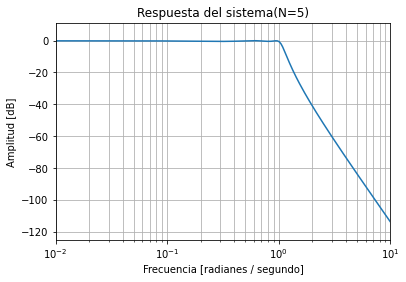

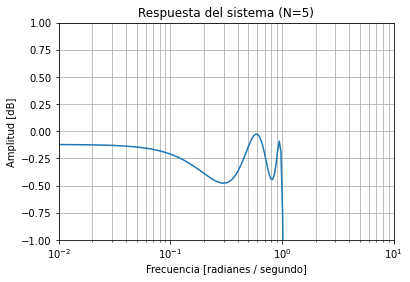

In [29]:
import matplotlib.pyplot as plt

#sys=signal.zpk2tf([],polost,0.2)
b,a=signal.zpk2tf([],polost,0.2)
w, h = signal.freqs(b, a)
plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta del sistema(N=5)')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta del sistema (N=5)')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ylim(-1, 1)

plt.show()


## Filtro de variable de estados

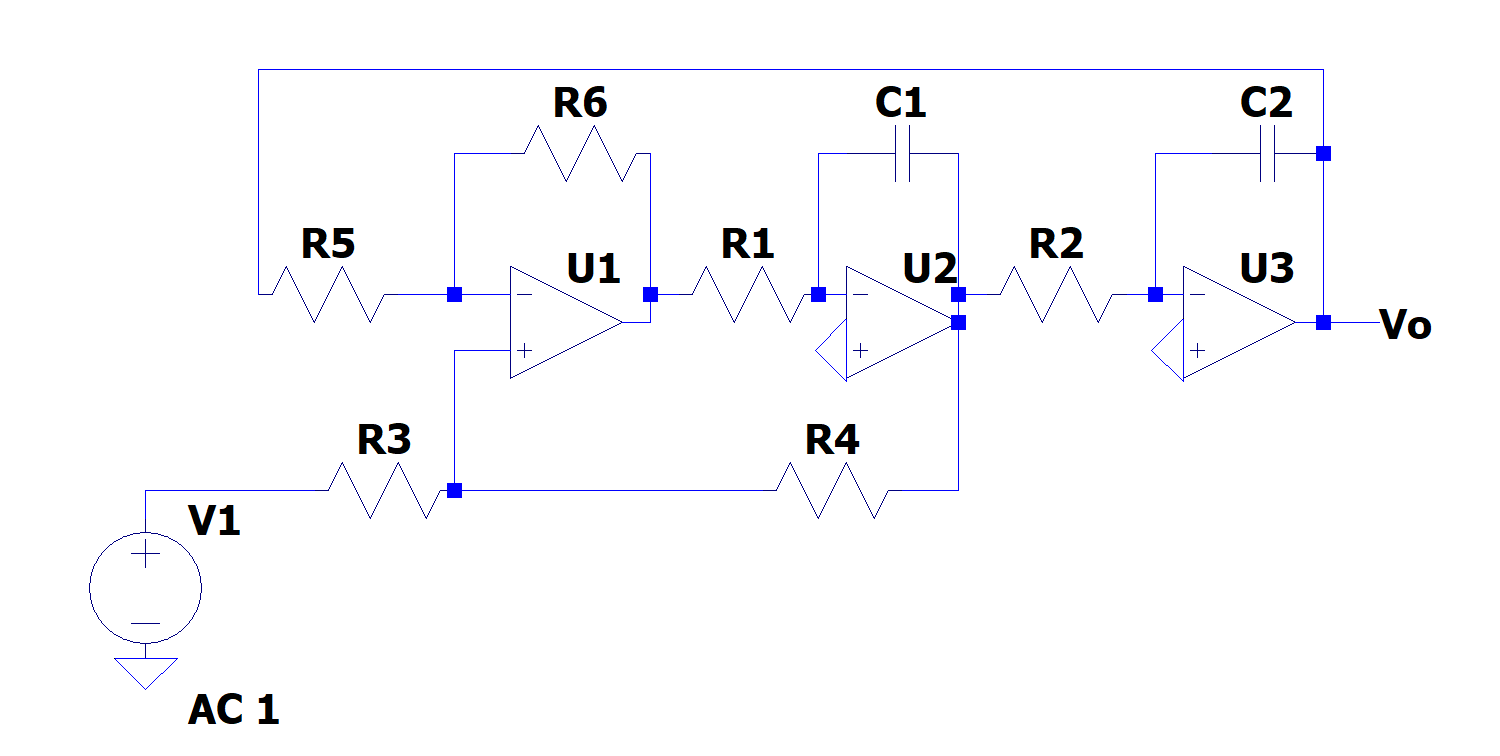





La transferencia del filtro queda:

$$G_{equiv}=\frac{G}{1-GH}$$

$$G_{equiv}=\frac{-\frac{1}{SC_1R_1}}{1+\frac{1}{SC_1R_1} \cdot \frac{R_3}{(R_3+R_4)} \cdot (1+\frac{R_6}{R_5})} $$

$$G_{equiv}= -\frac{(R_3+R_4)}{SC_1R_1(R_3+R_4)+R_3 (1+\frac{R_R}{R_5})} $$


$$ \frac{(R_3+R_4)}{SC_1R_1(R_3+R_4)+R_3 (1+\frac{R_R}{R_5}) \cdot \frac{1}{SC_2R_2}} $$

Ahora incorporando la última realimentación que queda:

$$ G_{equiv}=\frac{\frac{(R_3+R_4)}{SC_1R_1(R_3+R_4)+R_3 (1+\frac{R_R}{R_5}) \cdot \frac{1}{SC_2R_2}}}{1+\frac{(R_3+R_4)}{SC_1R_1(R_3+R_4)+R_3 (1+\frac{R_R}{R_5}) \cdot \frac{1}{SC_2R_2}}} $$

Resolviendo:

$$ G_{equiv}=\frac{R_3+R_4}{[SC_1R_1(R_3+R_4)+R_3(1+\frac{R_6}{R_5}]SC_2R_2+R_3+R_4} $$

$$ G_{equiv}=\frac{R_3+R_4}{S^2C_1C_2R_1R_2(R_3+R_4)+SC_2R_2R_3(1+\frac{R_6}{R_5})+R_3+R_4} $$

$$ \frac{V_o}{Vi}=\frac{R_4(1+\frac{R_6}{R_5})}{S^2C_1C_2R_1R_2(R_3+R_4)+SC_2R_2R_3(1+\frac{R_6}{R_5})+R_3+R_4} $$

$$ \frac{V_o}{Vi}=\frac{1}{C_1C_2R_1R_2(R_3+R_4)}\frac{R_4(1+\frac{R_6}{R_5})}{S^2+S\frac{R_3}{C_1R_1(R3+R4)}(1+\frac{R_6}{R_5})+\frac{1}{C_1C_2R_1R_2}} $$

$$ \frac{V_o}{Vi}=\frac{R_4(1+\frac{R_6}{R_5})}{(R_3+R_4)}\frac{\frac{1}{C_1C_2R_1R_2}}{S^2+S\frac{R_3}{C_1R_1(R3+R4)}(1+\frac{R_6}{R_5})+\frac{1}{C_1C_2R_1R_2}} $$

En donde:

$\omega_0^2=\frac{1}{C_1C_2R_1R_2} $

$ K=\frac{R_4(1+\frac{R_6}{R_5})}{(R_3+R_4)} $

$ \frac{\omega_0}{Q}=\frac{R_3(1+\frac{R_6}{R_5})}{C_1R_1(R3+R4)} $

Por lo tanto:

$ Q=\sqrt{\frac{C_1R_1}{C_2R_2}}\frac{R_3+R_4}{R_3(1+\frac{R6}{R5})} $

Si $R_5=R_6$

$\omega_0^2=\frac{1}{C_1C_2R_1R_2} $

$ K=\frac{2R_4}{(R_3+R_4)} $

$ Q=\sqrt{\frac{C_1R_1}{C_2R_2}}\frac{R_3+R_4}{2R_3} $




In [31]:
Seccion1=np.convolve([1, p1],[1, p2])
Seccion2=np.convolve([1, p3],[1, p4])
Q1=-np.sqrt(Seccion1[2])/Seccion1[1]
Q2=-np.sqrt(Seccion2[2])/Seccion2[1]
print("Q  etapa 1:",Q1.real)
print("Q  etapa 2:",Q2.real)
print("Wo etapa 1:",np.sqrt(Seccion1[2].real))
print("Wo etapa 2:",np.sqrt(Seccion2[2].real))



Q  etapa 1: 1.1324832052607716
Q  etapa 2: 4.2793106921559225
Wo etapa 1: 0.7021395872616784
Wo etapa 2: 1.0270345661174214


Si $C_1=C_2=C$ y $R_1=R_2=R$

$\omega_0=\frac{1}{RC} $

$ Q=\frac{R_3+R_4}{2_R3}$

Si $R_3=1$

$ Q=\frac{1+R_4}{2}$

Defino que C=1

por lo tanto:
Para la primer atapa de 2do orden:

$R=1,42 $

$R_4=2Q-1$

$R_4=1,26

Para la segunda etapa:

con el mismo análisis

$R=0,98 $

$R_4=2Q-1$

$R_4=7,56

Para la etapa de primer Orden:
 
El polo está ubicado en: 

$\sigma=-0,39$

Por lo que: 

Si utilizamos un RC y dejamos que C=1:

$R=2,56 $

# Ejercicio 6

Diseñar un filtro pasabajos a partir de una estructura MFB (Ver apéndice) sabiendo que debe proporcionar un retardo constante de 100 µs en la banda de paso, con un desvío del retardo máximo de 10% para la frecuencia de ⍵1=25k rad/s y un máximo de 1  dB de atenuación a la frecuencia de ⍵2= 10k rad/s.

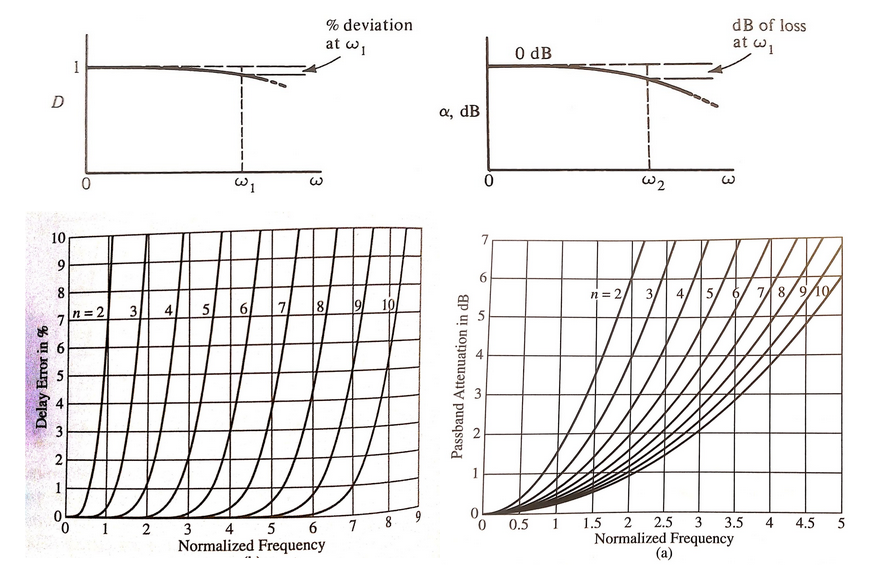

Para cumplir com ambas especificaciones se adopta n=4.


Para ello determinamos el polinomio de Bessel:

$$coth(s)=\frac{1}{s}+\frac{1}{\frac{3}{s}+\frac{1}{\frac{5}{s}+\frac{1}{\frac{7}{s}}}} $$

Queda de la siguiente manera:

$$B_4(s)=s^4+10s^3+45s^2+105s+105$$

$$T(s)=\frac{B_4(0)}{B_4(s)}$$

$$T(s)=\frac{105}{s^4+10s^3+45s^2+105s+105}$$


Tomando las raices del polinomio:

    

In [16]:
den=[1,10,45,105,105]
np.roots(den).round(2)

array([-2.1+2.66j, -2.1-2.66j, -2.9+0.87j, -2.9-0.87j])

Son cuatro polos complejos conjugados dos etapas de 2do orden

Sabiendo que los polos estan en $P_{12}=\alpha_1±j\alpha_1$  $P_{34}=\alpha_2±j\alpha_2$

$$T(s)=\frac{1}{s^2-2s\alpha_1+(\alpha_1^2+\beta_1^2)} \cdot  \frac{1}{s^2-2s\alpha_2+(\alpha_2^2+\beta_2^2)}$$

Reemplazando:

$$T(s)=\frac{11,48}{s^2+4,2s+11,48} \cdot \frac{9,16}{s^2+5,8s+9,16} $$

## Primer etapa:

$\omega_0=3,37$
$Q=\frac{3,37}{4,2}=0,8$

## Segunda etapa:

$\omega_0=3$
$Q=\frac{3}{5,8}=0,51$

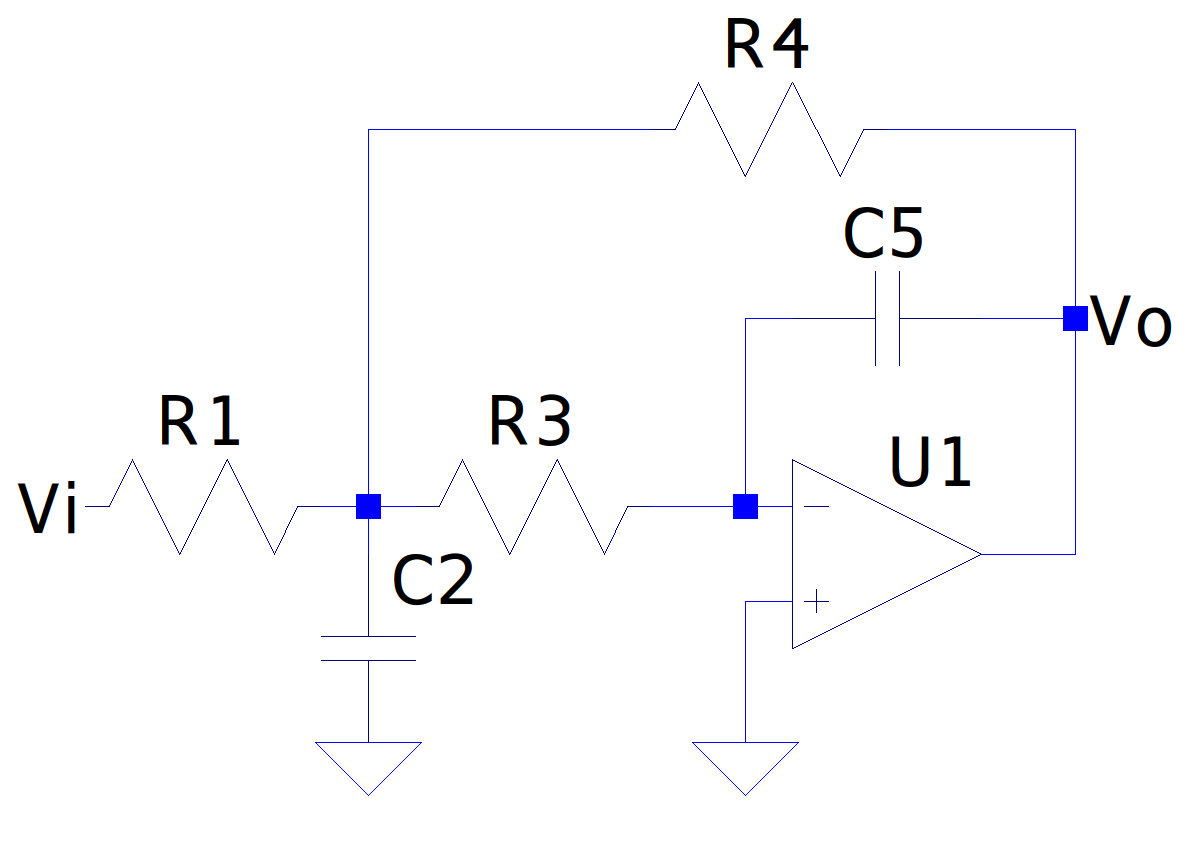



$$\omega_0^2=\frac{1}{R_4C_5R_3C_2}$$

$$K=-\frac{R_4}{R_1} $$

$$Q=\frac{\sqrt{R_3R_4C_2C_5}}{(R_3+R_4+\frac{R_4R_3}{R1})C_5}$$

Como tenemos que K=1,

$R_4=R_1=R_3=1\Omega$

Si reemplazamos $\omega_0^2$ en la expresion de Q tenemos

$$Q=\frac{1}{3\omega_0C_5}$$

Como $\omega_0^2=11,48$ 

Como $\omega_0=3,38$

$$Q=\frac{1}{3,38 (3)C_5}$$

$$Q=\frac{1}{10,14 C_5} $$

$$C_5=\frac{1}{8,11} $$

$$C_5=0,12$$

$C_2=\frac{1}{\omega_0^2 C_5}$

$C_2=\frac{1}{11,35 C_5}=0,73$

Para la segunda etapa:

Como $\omega_0^2=9$ 

Como $\omega_0=3$

$$Q=\frac{1}{9C_5} $$

$$C_5=\frac{1}{9 Q} $$

$$C_5=0,21$$

$C_2=\frac{1}{9 C_5}=0,51$


### Valores de los acumuladores

Primer etapa:

$C_2=0,73F$

$C_5=0,12F$

Segunda etapa:

$C_2=0,51F$

$C_5=0,21F$

### Desnormalización


Se eleva el valor de todos los resistores a 1K$\Omega$

y recordamos que nuestra $\omega_{norm}=10k \frac{rad}{seg}$





$C'=\frac{C}{1K\omega_{norm}} $




## Implementación

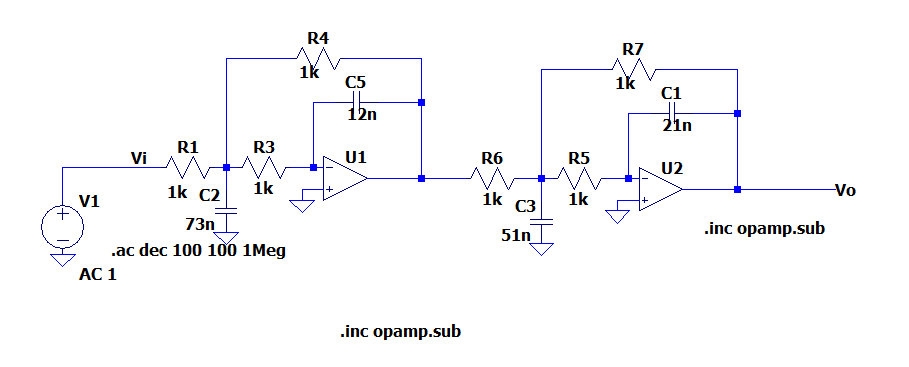

### Simulación en LtSPice

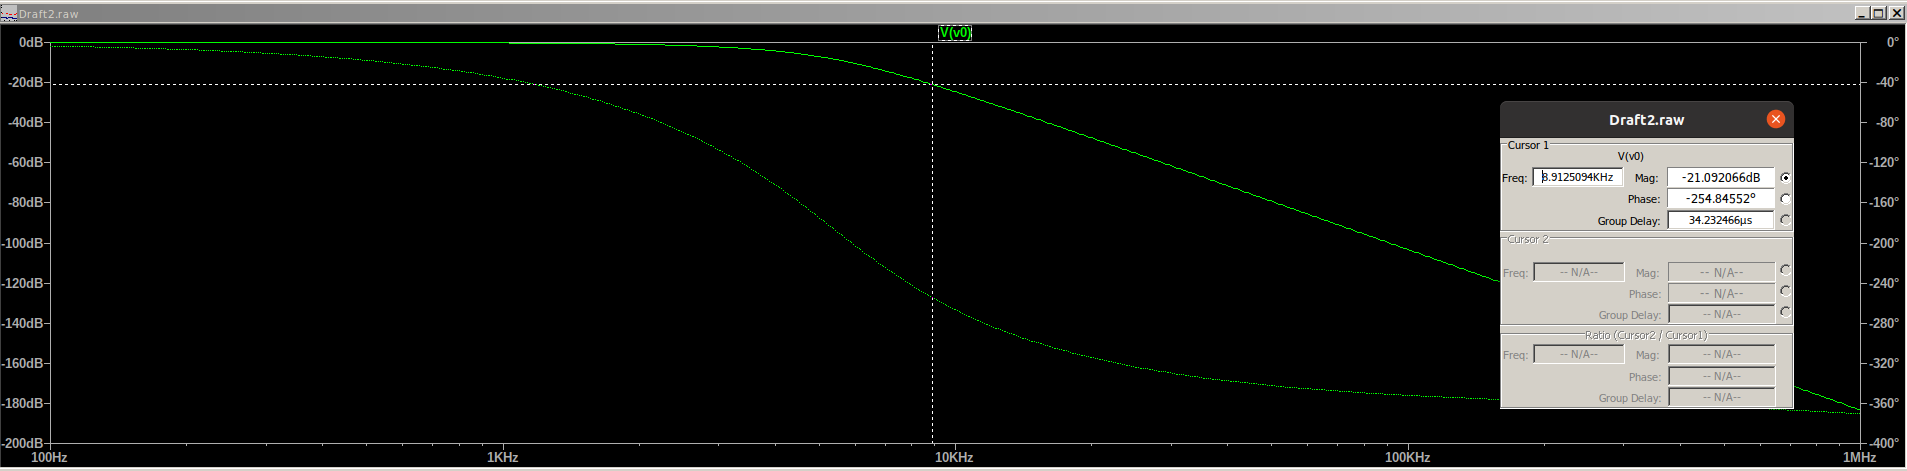

## Ejercicio 7

### Primer etapa

Poles: [-0.225+0.97435876j -0.225-0.97435876j]
Zeros: [0.]


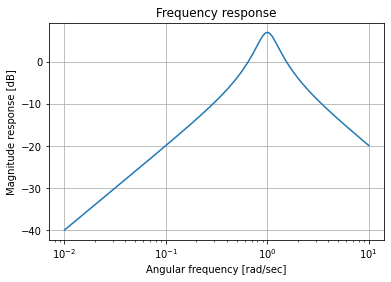

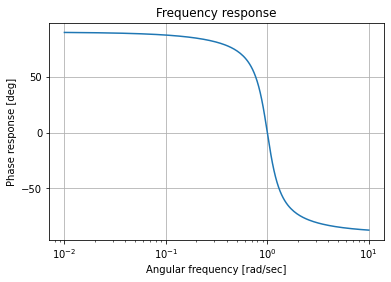

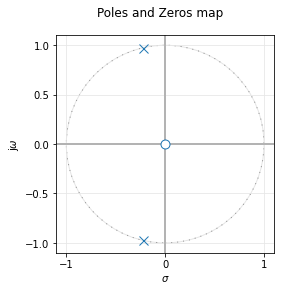

In [2]:
import scipy.signal as sig
from mpl_toolkits.mplot3d import Axes3D
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from splane import pzmap, grpDelay, bodePlot, convert2SOS
import math

plt.close('all')

num = [1,0]
den = [1,0.45,1]  

myFilter = sig.TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)


w, mag, phase = myFilter.bode(n=200)

 #  plt.figure()
plt.figure("Magnitude response")
plt.semilogx(w, mag)    # Bode magnitude plot
#plt.ylim(-2,2)
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')
   
#   plt.figure()
plt.figure("Phase response")
plt.semilogx(w, phase)    # Bode phase plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase response [deg]')
plt.title('Frequency response')
    
pzmap(myFilter)


plt.rcParams.update({'font.size': 16})

plt.show()

SOSpolynomials = convert2SOS(myFilter)

### Segunda Etapa

Poles: [-0.134+1.20500788j -0.134-1.20500788j]
Zeros: [0.]


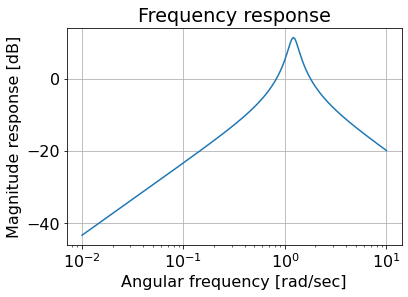

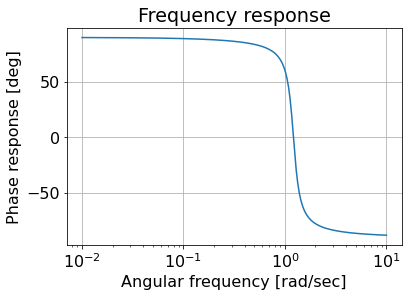

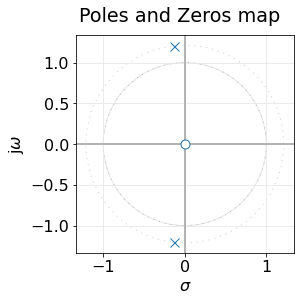

In [3]:
import scipy.signal as sig
from mpl_toolkits.mplot3d import Axes3D
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from splane import pzmap, grpDelay, bodePlot, convert2SOS
import math

plt.close('all')

num = [1,0]
den = [1,0.268,1.47]  

myFilter = sig.TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)


w, mag, phase = myFilter.bode(n=200)

 #  plt.figure()
plt.figure("Magnitude response")
plt.semilogx(w, mag)    # Bode magnitude plot
#plt.ylim(-2,2)
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')
   
#   plt.figure()
plt.figure("Phase response")
plt.semilogx(w, phase)    # Bode phase plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase response [deg]')
plt.title('Frequency response')
    
pzmap(myFilter)


plt.rcParams.update({'font.size': 16})

plt.show()

SOSpolynomials = convert2SOS(myFilter)

### Tercera Etapa

Poles: [-0.091+0.81346112j -0.091-0.81346112j]
Zeros: [0.]


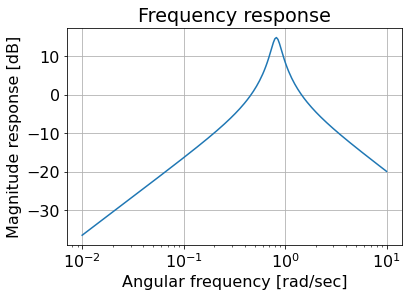

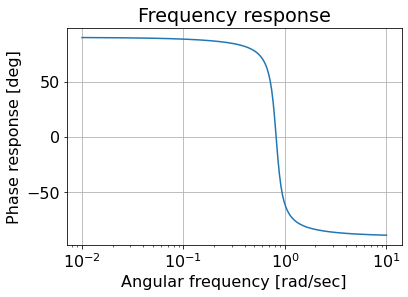

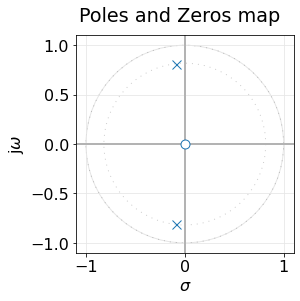

In [4]:
import scipy.signal as sig
from mpl_toolkits.mplot3d import Axes3D
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from splane import pzmap, grpDelay, bodePlot, convert2SOS
import math

plt.close('all')

num = [1,0]
den = [1,0.182,0.67]  

myFilter = sig.TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)


w, mag, phase = myFilter.bode(n=200)

 #  plt.figure()
plt.figure("Magnitude response")
plt.semilogx(w, mag)    # Bode magnitude plot
#plt.ylim(-2,2)
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')
   
#   plt.figure()
plt.figure("Phase response")
plt.semilogx(w, phase)    # Bode phase plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase response [deg]')
plt.title('Frequency response')
    
pzmap(myFilter)


plt.rcParams.update({'font.size': 16})

plt.show()

SOSpolynomials = convert2SOS(myFilter)

## Ejercicio 8

### 8.a

Poles: [-0.205+1.04784302j -0.205-1.04784302j]
Zeros: [0. 0.]


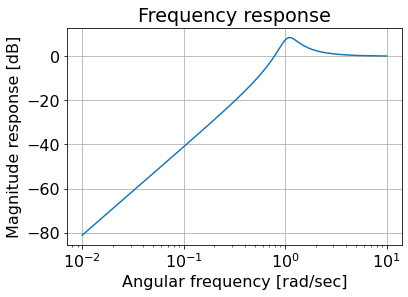

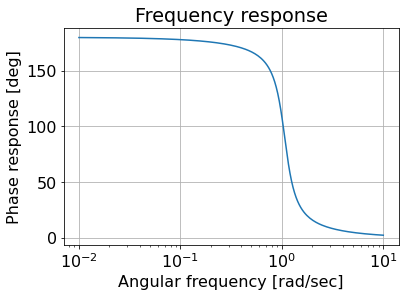

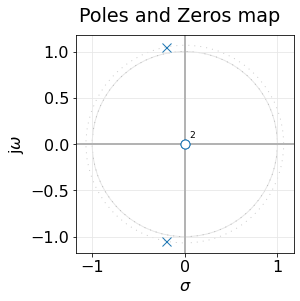

In [5]:

import scipy.signal as sig
from mpl_toolkits.mplot3d import Axes3D
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from splane import pzmap, grpDelay, bodePlot, convert2SOS
import math

plt.close('all')

num = [1,0,0]
den = [1,0.41,1.14]  

myFilter = sig.TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)


w, mag, phase = myFilter.bode(n=200)

 #  plt.figure()
plt.figure("Magnitude response")
plt.semilogx(w, mag)    # Bode magnitude plot
#plt.ylim(-2,2)
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')
   
#   plt.figure()
plt.figure("Phase response")
plt.semilogx(w, phase)    # Bode phase plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase response [deg]')
plt.title('Frequency response')
    
pzmap(myFilter)


plt.rcParams.update({'font.size': 16})

plt.show()

SOSpolynomials = convert2SOS(myFilter)

### 8.b

Poles: [-0.5+0.42426407j -0.5-0.42426407j]
Zeros: [0. 0.]


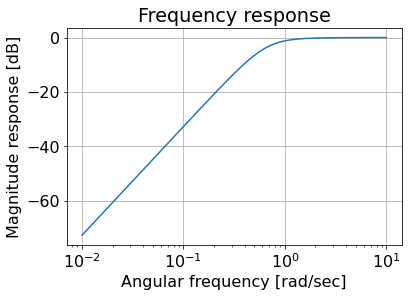

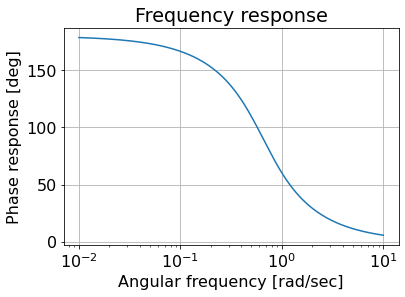

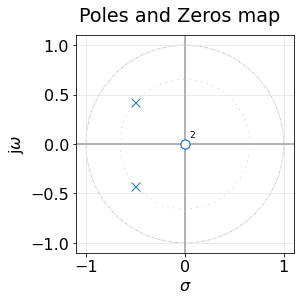

In [8]:

import scipy.signal as sig
from mpl_toolkits.mplot3d import Axes3D
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from splane import pzmap, grpDelay, bodePlot, convert2SOS
import math

plt.close('all')

num = [1,0,0]
den = [1,1,0.43]  

myFilter = sig.TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)


w, mag, phase = myFilter.bode(n=200)

 #  plt.figure()
plt.figure("Magnitude response")
plt.semilogx(w, mag)    # Bode magnitude plot
#plt.ylim(-2,2)
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')
   
#   plt.figure()
plt.figure("Phase response")
plt.semilogx(w, phase)    # Bode phase plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase response [deg]')
plt.title('Frequency response')
    
pzmap(myFilter)


plt.rcParams.update({'font.size': 16})

plt.show()

SOSpolynomials = convert2SOS(myFilter)